In [28]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
import seaborn as sns
import sys
from AFSA import AFSA
from scipy import stats

np.set_printoptions(threshold=sys.maxsize)

import os

# import user-feature data

In [29]:
cluster = pd.read_csv('ratings_nutrition_AV_20_20.csv', usecols=['user_id', 'calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates'] ,engine='python').set_index('user_id')
cluster

,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
user_id,,,,,,,
1533,239.983333,16.333333,43.333333,9.000000,21.250000,18.666667,8.000000
1535,222.534359,15.328205,40.830769,11.861538,14.348718,20.707692,8.133333
1634,238.914286,17.857143,9.428571,13.428571,23.857143,24.428571,6.571429
1676,299.000000,20.500000,56.500000,25.500000,39.000000,12.250000,8.500000
1891,250.127273,17.454545,47.545455,15.727273,10.909091,26.636364,9.818182
...,...,...,...,...,...,...,...
2001330613,217.821429,16.428571,35.928571,12.642857,17.071429,21.571429,6.785714
2001356926,259.564286,21.142857,13.357143,21.142857,38.642857,33.857143,4.285714
2001362355,303.845946,20.162162,36.675676,23.648649,30.540541,27.351351,9.837838


# Detemine the number of clusters using Silhouette and Elbow methods

In [19]:
for i in range(2,15):
    labels = KMeans(n_clusters=i,init="k-means++",n_init=10, random_state=200).fit(cluster_1).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(cluster_1,labels,metric="euclidean",random_state=200)))

Silhouette score for k(clusters) = 2 is 0.4451252248659931
Silhouette score for k(clusters) = 3 is 0.39550766617584854
Silhouette score for k(clusters) = 4 is 0.36631323235357255
Silhouette score for k(clusters) = 5 is 0.3333420829469691
Silhouette score for k(clusters) = 6 is 0.30056156292835595
Silhouette score for k(clusters) = 7 is 0.2830773381740031
Silhouette score for k(clusters) = 8 is 0.2837767826100948
Silhouette score for k(clusters) = 9 is 0.28062599979493397
Silhouette score for k(clusters) = 10 is 0.2720820215547666
Silhouette score for k(clusters) = 11 is 0.2642650166970088
Silhouette score for k(clusters) = 12 is 0.25652274822967247
Silhouette score for k(clusters) = 13 is 0.2523586617898513
Silhouette score for k(clusters) = 14 is 0.24915859112056807


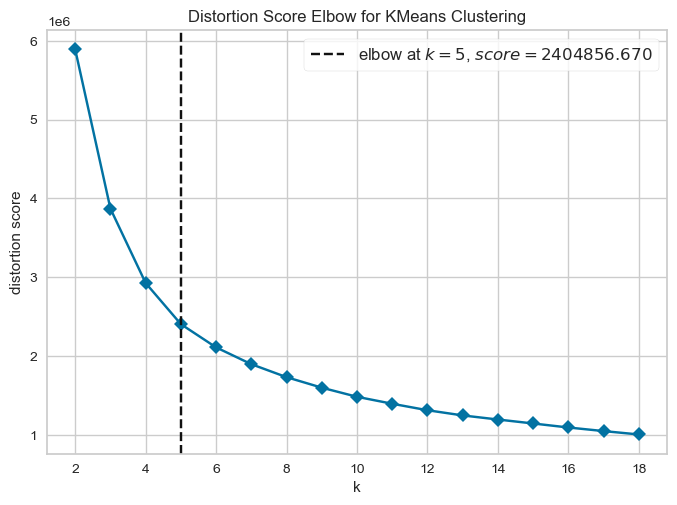

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=18, n_init=10, random_state=200),
                 k=(2, 19), timings=False)

In [20]:
from yellowbrick.cluster.elbow import kelbow_visualizer

kelbow_visualizer(KMeans(n_init=10, random_state=200),
                  cluster_1, metric='distortion',
                  k=(2, 19),
                  timings=False)

# Users clustering 

In [21]:
#ready to cluster
cluster_siz = 5
KM = KMeans(n_clusters=cluster_siz, init="k-means++", n_init=10)
predictions = KM.fit(cluster)
print(predictions.inertia_)

2404970.71940874


In [22]:
x = cluster
y = predictions.labels_
metrics.silhouette_score(x,y,metric="euclidean")

0.3338537223017118

In [24]:
#add col cluster to ratings_av table
cluster['cluster'] = predictions.labels_
cluster

,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,cluster
user_id,,,,,,,,
1533,239.983333,16.333333,43.333333,9.000000,21.250000,18.666667,8.000000,1
1535,222.534359,15.328205,40.830769,11.861538,14.348718,20.707692,8.133333,1
1634,238.914286,17.857143,9.428571,13.428571,23.857143,24.428571,6.571429,1
1676,299.000000,20.500000,56.500000,25.500000,39.000000,12.250000,8.500000,3
1891,250.127273,17.454545,47.545455,15.727273,10.909091,26.636364,9.818182,2
...,...,...,...,...,...,...,...,...
2001330613,217.821429,16.428571,35.928571,12.642857,17.071429,21.571429,6.785714,1
2001356926,259.564286,21.142857,13.357143,21.142857,38.642857,33.857143,4.285714,2
2001362355,303.845946,20.162162,36.675676,23.648649,30.540541,27.351351,9.837838,3


In [25]:
cluster.to_csv('km_5_cluster.csv')

In [27]:
#save model
from joblib import dump, load
dump(KM, "models/kmeans_5.joblib")

['models/kmeans_5.joblib']